 # 1. Exploratory Data Analysis

In [1]:
#import all the libraries required for our analysis 
import pandas as pd
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings(action="ignore")


In [2]:
#Loading all the required files 

df_microwage = pd.read_csv('/Users/abhisheksuga/Downloads/microwage.csv')
df_regions = pd.read_csv('/Users/abhisheksuga/Downloads/regions.csv')
df_fips = pd.read_csv('/Users/abhisheksuga/Downloads/fips.csv')
df_metareas = pd.read_csv('/Users/abhisheksuga/Downloads/metareas (1).csv')
df_industries = pd.read_csv('/Users/abhisheksuga/Downloads/industries (1).csv')


## 1.1 Descriptive Statistics

In [3]:
df_microwage.describe(include="all").transpose()  #descriptive statistics of a given dataset 

,count,mean,std,min,25%,50%,75%,max
region,1349258.0,27.827012,10.331260,11.000000,21.0,31.000000,33.000000,42.0
statefip,1349258.0,27.848829,15.888751,1.000000,13.0,27.000000,41.000000,56.0
metaread,1349258.0,3392.802188,2966.955541,0.000000,0.0,3120.000000,5960.000000,9360.0
puma,1349258.0,2210.346177,2391.579631,100.000000,800.0,1800.000000,3202.000000,77777.0
perwt,1349258.0,104.666181,74.467402,1.000000,64.0,85.000000,118.000000,1954.0
age,1349258.0,40.466133,13.190645,17.000000,29.0,41.000000,51.000000,65.0
female,1349258.0,0.498947,0.499999,0.000000,0.0,0.000000,1.000000,1.0
race_nonwhite,1349258.0,0.160221,0.366811,0.000000,0.0,0.000000,0.000000,1.0
edyrs,1349258.0,13.651400,2.617561,0.000000,12.0,13.480000,16.150000,18.0
occ_managprof,1349258.0,0.318844,0.466029,0.000000,0.0,0.000000,1.000000,1.0


In [4]:
df_microwage.isnull().sum() #Checking for any null values in the given dataset

region               0
statefip             0
metaread             0
puma                 0
perwt                0
age                  0
female               0
race_nonwhite        0
edyrs                0
occ_managprof        0
occ_techsalad        0
occ_service          0
occ_farm             0
occ_product          0
occ_operator         0
occ_service_np       0
occ_service_broad    0
industry             0
expyrs               0
wkwage               0
dtype: int64

In [5]:
list(df_microwage.columns) #listing all the columns present in the datset

['region',
 'statefip',
 'metaread',
 'puma',
 'perwt',
 'age',
 'female',
 'race_nonwhite',
 'edyrs',
 'occ_managprof',
 'occ_techsalad',
 'occ_service',
 'occ_farm',
 'occ_product',
 'occ_operator',
 'occ_service_np',
 'occ_service_broad',
 'industry',
 'expyrs',
 'wkwage']

In [6]:
df_microwage.head(5).transpose() #Since the dataframe has large number of columns, i have used transpose to diplay rows as columns and vice-versa


,0,1,2,3,4
region,42.00000,21.00000,42.000000,42.000000,42.000000
statefip,6.00000,26.00000,6.000000,6.000000,6.000000
metaread,5170.00000,3720.00000,680.000000,6780.000000,7470.000000
puma,2601.00000,2602.00000,3901.000000,7802.000000,6701.000000
perwt,74.00000,37.00000,91.000000,219.000000,55.000000
age,19.00000,27.00000,30.000000,21.000000,40.000000
female,0.00000,0.00000,0.000000,1.000000,1.000000
race_nonwhite,0.00000,0.00000,0.000000,0.000000,0.000000
edyrs,11.99000,3.19000,11.990000,13.350000,7.230000
occ_managprof,0.00000,0.00000,0.000000,0.000000,0.000000


In [7]:
df_microwage.info() #to retrieve the information of the given dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349258 entries, 0 to 1349257
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   region             1349258 non-null  int64  
 1   statefip           1349258 non-null  int64  
 2   metaread           1349258 non-null  int64  
 3   puma               1349258 non-null  int64  
 4   perwt              1349258 non-null  int64  
 5   age                1349258 non-null  int64  
 6   female             1349258 non-null  int64  
 7   race_nonwhite      1349258 non-null  int64  
 8   edyrs              1349258 non-null  float64
 9   occ_managprof      1349258 non-null  int64  
 10  occ_techsalad      1349258 non-null  int64  
 11  occ_service        1349258 non-null  int64  
 12  occ_farm           1349258 non-null  int64  
 13  occ_product        1349258 non-null  int64  
 14  occ_operator       1349258 non-null  int64  
 15  occ_service_np     1349258 non-n

In [8]:
np.median(df_microwage['edyrs'])

13.4799995422363

## 1.2 Visualization of the Data

### 1.2.1 Visualization of the Quantitative Data

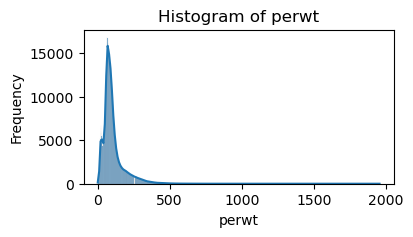

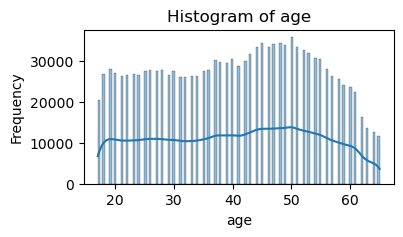

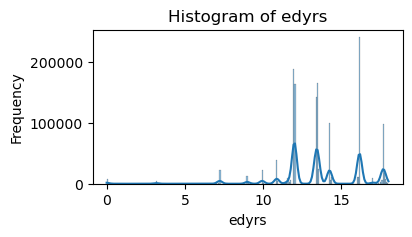

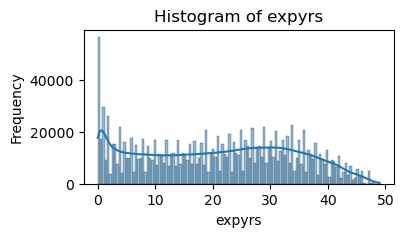

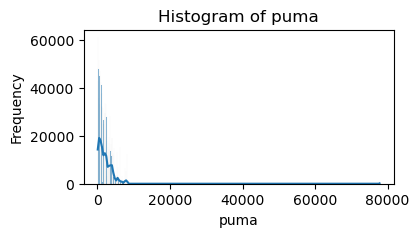

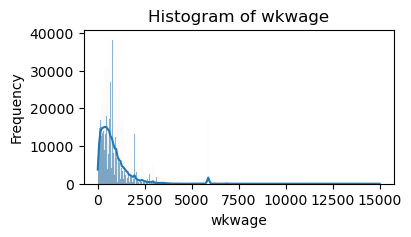

In [9]:

quantitative_data  = ['perwt','age','edyrs','expyrs','puma','wkwage'] # listing quantitative data from the  given dataset
 
for column in quantitative_data:
    plt.figure(figsize=(4, 2))
    
    sn.histplot(df_microwage[column], kde=True)     #plotting histogram to check the underlying distribution 
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


    

From the histogram it is see seen that features like wkwage , perwt and puma are right skewed.Edyrs is left skewed and the age and expyrs are almost normally distributed 
1. Most of the wkwage fall under the range 0-6000
2. The concentration of values in the 0 to 10000 range suggests that there may be PUMAs with relatively high population densities.
3. The skewness of the perwt distribution suggests that the majority of individuals(0-500) in the dataset may have lower person weights, while a smaller proportion (500 - 200 )of individuals may have higher weights. This skewness may be influenced by various factors, such as survey sampling methods, population distribution, or survey design features.
4. Age and expyrs are  normally didtributed
5. The tail of the distribution extends towards the lower end of the range, with the majority of values clustered towards the higher end. Even though the median age is 13, the  concentration of values towards (7.5 to 17) and fewer values towards  (0 to 7.5),indicates left skewness.



### 1.2.2 Visualization of the Qualitative Data

In [10]:
df_microwage_original =df_microwage.copy()


In [11]:
# Mapping all the categorical variables by decoding their original state from the reference csv files given
region_mapping = dict(zip(df_regions['code'], df_regions['name']))
industry_mapping =dict(zip(df_industries['code'],df_industries['name']))
fips_mapping = dict(zip(df_fips['code'], df_fips['name']))
metareas_mapping = dict(zip(df_metareas['code'],df_metareas['name']))
gender_mapping = {0:'male' ,1:'female'}
race_mapping = {0:'white Caucasian',1:'other'}



In [12]:
#Replacing their original values back
df_microwage_original['industry'] = df_microwage_original['industry'].replace(industry_mapping)
df_microwage_original['region'] = df_microwage_original['region'].replace(region_mapping)
df_microwage_original['statefip'] = df_microwage_original['statefip'].replace(fips_mapping)
df_microwage_original['metaread'] = df_microwage_original['metaread'].replace(metareas_mapping)
df_microwage_original['female']=df_microwage_original['female'].replace(gender_mapping)
df_microwage_original['race_nonwhite']=df_microwage_original['race_nonwhite'].replace(race_mapping)

qualitative_data = ['industry','region' ,'statefip','metaread','female','race_nonwhite']

In [13]:
# Set the display options to see the entire output 
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Set display width to fit all columns
# pd.set_option('display.max_colwidth', None)  # Set maximum column width



# # Reset display options to defaults
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


In [14]:
df_microwage_original['industry'].value_counts()          #Checking the distribution using values_counts (plot is overlapping)

industry
Elementary and secondary schools                             99025
All construction                                             81809
Eating and drinking places                                   76430
Hospitals                                                    64327
Colleges and universities                                    40686
                                                             ...  
Barber shops                                                   279
Fishing, hunting, and trapping                                 272
Leather products, except footwear                              259
Metal industries, n.s.                                         258
Dyeing and finishing textiles, except wool and knit goods      183
Name: count, Length: 216, dtype: int64

In [15]:
df_microwage_original['metaread'].value_counts()  

metaread
Not identifiable or not in an MSA    345703
Los Angeles-Long Beach, CA            38731
Chicago-Gary-Lake, IL                 33875
New York-Northeastern NJ              33426
Washington, DC/MD/VA                  26348
                                      ...  
Sioux City, IA/NE                       416
Gadsden, AL                             414
Manchester, NH                          403
Sumter, SC                              394
Houma-Thibodoux, LA                     373
Name: count, Length: 299, dtype: int64

In [16]:
# Since the job classification category is mutually exclusive , making a seperate dataframe for simplicity
job_classification_df = df_microwage_original[['occ_managprof', 'occ_techsalad', 'occ_service', 'occ_farm', 'occ_product', 'occ_operator', 'occ_service_np', 'occ_service_broad']]


job_mapping = {
    'occ_managprof': 'managerial or professional',
    'occ_techsalad': 'technical, salaried',
    'occ_service': 'service industry',
    'occ_farm': 'farming',
    'occ_operator': 'machine operator',
    'occ_product': 'general production',
    'occ_service_broad': 'new, broader sense of service',
    'occ_service_np': 'non-professional services'
}

# Create a new column representing the decoded job classifications
job_classification_df['job_classification'] = job_classification_df.apply(lambda row: ', '.join([job_mapping[col] for col, val in row.items() if val == 1]), axis=1)

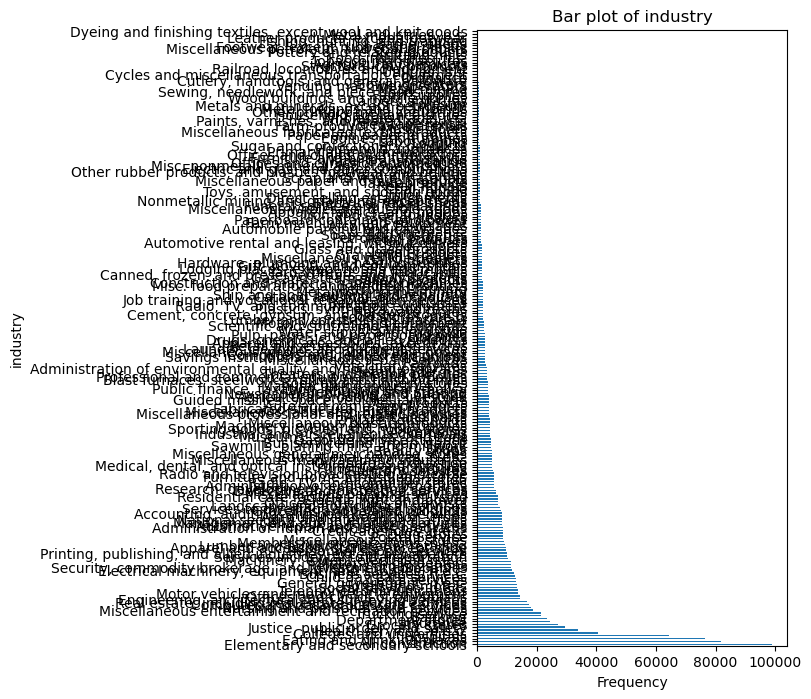

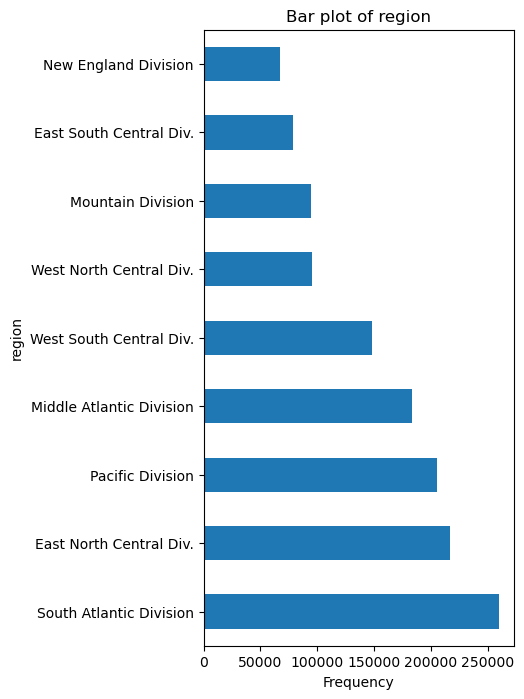

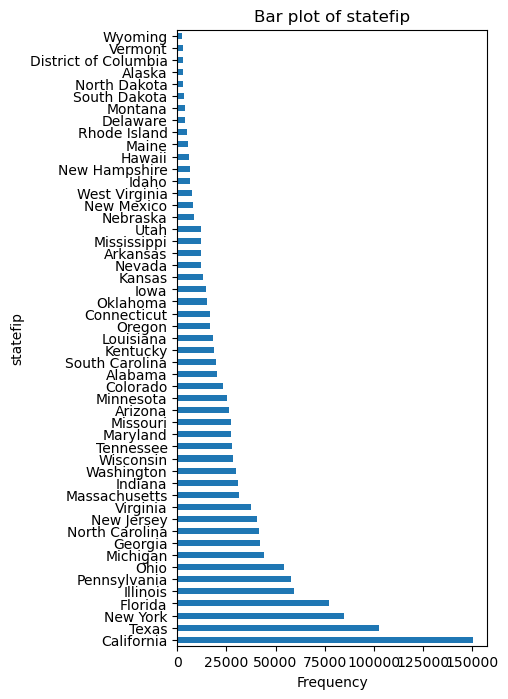

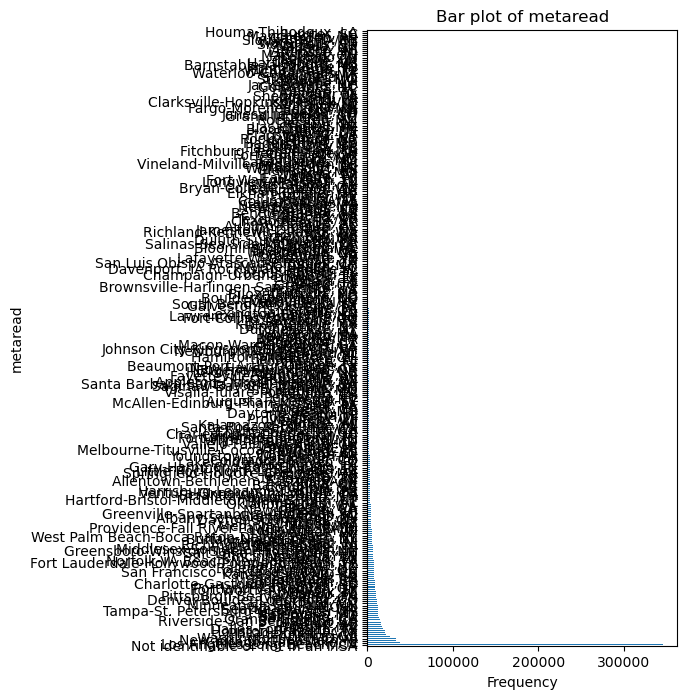

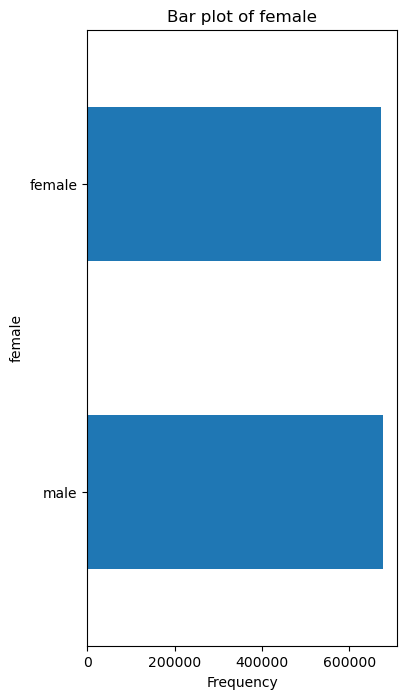

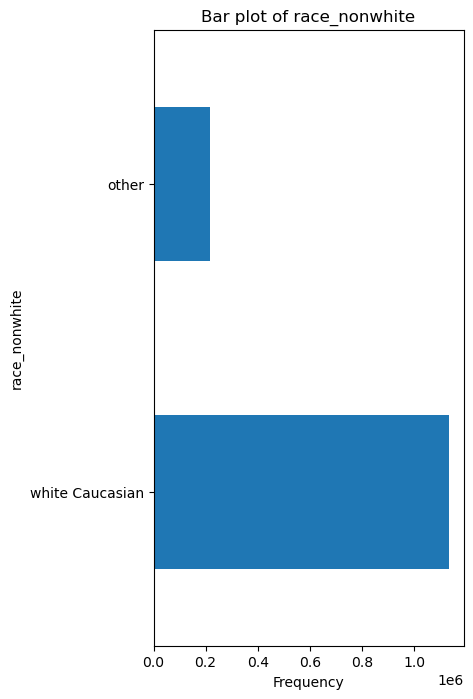

In [17]:

for i in qualitative_data:
    plt.figure(figsize=(4, 8))
    df_microwage_original[i].value_counts().plot(kind='barh', xlabel='Frequency', ylabel= i)
    plt.title(f"Bar plot of {i}")
    plt.show()


Region:
The South Atlantic division has the highest frequency, indicating that a significant proportion of observations are from this region.
The New England division has the lowest frequency, suggesting that it is less represented in the dataset.

State FIP:

Wyoming has the lowest frequency, while California has the highest frequency, indicating variability in representation across states.
Female:

The distribution between male and female categories is not equal, with slightly more observations for one gender compared to the other.
Race_nonwhite:

The 'white_caucasian' category has the highest frequency, suggesting that a majority of observations in the dataset belong to this racial category.
Other racial categories have lower frequencies compared to 'white_caucasian', indicating less representation of these racial groups.



Industry:

The 'Elementary and secondary schools' category has the highest frequency, indicating that a significant proportion of observations belong to this industry.
The 'Dyeing and finishing textiles' category has a lower frequency, suggesting less representation in the dataset.
Metaread:

The 'Not identifiable or not in an MSA' category has the highest frequency, indicating that a majority of observations are not identifiable or not in a Metropolitan Statistical Area (MSA).
The 'Houma-Thibodoux, LA' category has a lower frequency, suggesting less representation in the dataset.


The distribution of categorical variables, particularly when encoded as dummy variables, plays a crucial role in model building. Imbalances in category frequencies can lead to biases, multicollinearity issues, and challenges in model interpretation.

Text(0.5, 1.0, 'Bar plot of job classification')

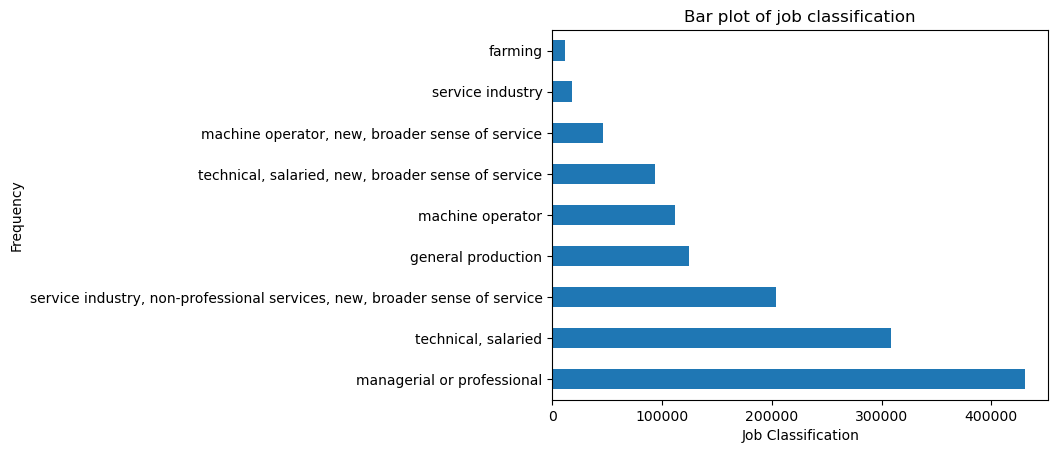

In [18]:
job_classification_df['job_classification'].value_counts().plot(kind='barh', xlabel='Job Classification', ylabel='Frequency')
plt.title('Bar plot of job classification')

The 'farming' category has a lower frequency, indicating fewer observations in this job classification.
Categories such as 'managerial' or 'professional' have higher frequencies, suggesting that a significant proportion of observations fall into these job classifications.

In [19]:
df_microwage['female'].value_counts()

female
0    676050
1    673208
Name: count, dtype: int64

### 1.2.3 Bivariate Analysis 

<Figure size 400x200 with 0 Axes>

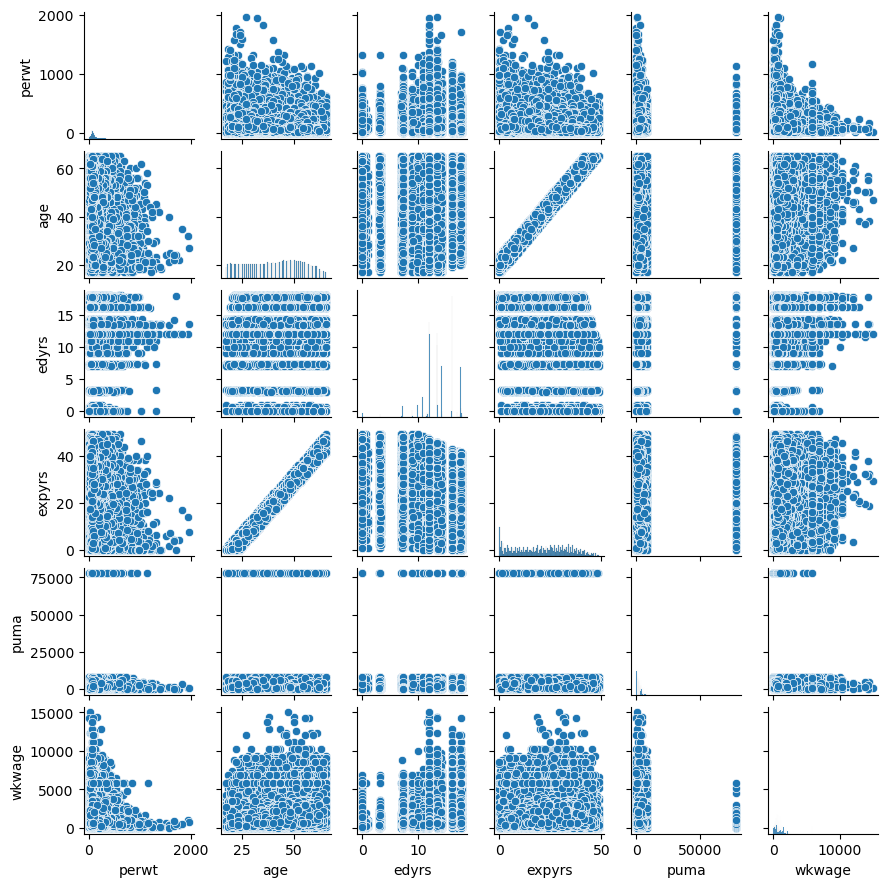

In [20]:
# let us now see  the relationship between each of the independent variables and the dependent variable.
# Considering only the quantitative data for plotting in pairs


plt.figure(figsize=(4, 2))

sn.pairplot(df_microwage[quantitative_data], height=1.5)

#plt.savefig('pairplot.png', dpi=300) 

Based on the overview of the dataset we are assuming that certain columns are highly influencing the wkwage compared to others. Using pairplot() function of seaborn  for visualizing the relationship between these variables (columns of interest instead of scatterplot for our convienience .
It is clear from the pairplot that age and expyrs having a linear relationship .



In [21]:
#correlation matrix

df_microwage.corr().transpose()


,region,statefip,metaread,puma,perwt,age,female,race_nonwhite,edyrs,occ_managprof,occ_techsalad,occ_service,occ_farm,occ_product,occ_operator,occ_service_np,occ_service_broad,industry,expyrs,wkwage
region,1.000000,-0.278187,0.123037,0.089317,0.011905,-0.020698,-0.013220,0.065458,-0.042638,-0.002552,0.001537,-0.000710,0.029672,0.007812,-0.013226,-0.001252,0.003857,-0.013744,-0.016390,-0.007943
statefip,-0.278187,1.000000,-0.080201,-0.104619,-0.007118,0.006315,0.001644,-0.058291,0.001127,-0.008333,-0.008054,-0.000830,-0.010243,0.010424,0.018026,-0.000303,-0.001154,-0.012273,0.008257,-0.026303
metaread,0.123037,-0.080201,1.000000,0.148510,0.067974,-0.017029,-0.001770,0.078728,0.066149,0.061743,0.019803,-0.010299,-0.034724,-0.035139,-0.064034,-0.007942,-0.012259,0.061913,-0.031683,0.091531
puma,0.089317,-0.104619,0.148510,1.000000,0.043026,-0.014509,-0.003847,0.061076,-0.012020,0.011758,0.006280,0.000376,-0.008220,-0.010007,-0.015005,-0.000242,0.000723,0.012422,-0.015379,0.031399
perwt,0.011905,-0.007118,0.067974,0.043026,1.000000,-0.154690,-0.036106,0.090891,-0.081153,-0.066603,-0.000968,0.052259,-0.005803,0.016915,0.024055,0.055337,0.064805,-0.027273,-0.142463,-0.058318
age,-0.020698,0.006315,-0.017029,-0.014509,-0.154690,1.000000,0.014178,-0.035697,0.096852,0.134065,-0.034002,-0.130422,-0.020619,0.010642,0.000789,-0.135760,-0.164669,0.013390,0.986195,0.247925
female,-0.013220,0.001644,-0.001770,-0.003847,-0.036106,0.014178,1.000000,0.033885,0.058834,0.067986,0.193998,0.062116,-0.050886,-0.248045,-0.207770,0.089164,0.067449,0.320753,0.005622,-0.190753
race_nonwhite,0.065458,-0.058291,0.078728,0.061076,0.090891,-0.035697,0.033885,1.000000,-0.005022,-0.028964,0.005732,0.056012,-0.019729,-0.040822,0.011664,0.058848,0.060485,0.056760,-0.035559,-0.041293
edyrs,-0.042638,0.001127,0.066149,-0.012020,-0.081153,0.096852,0.058834,-0.005022,1.000000,0.482575,-0.029662,-0.208802,-0.109530,-0.156923,-0.243224,-0.221021,-0.269677,0.268243,-0.058142,0.345387
occ_managprof,-0.002552,-0.008333,0.061743,0.011758,-0.066603,0.134065,0.067986,-0.028964,0.482575,1.000000,-0.445858,-0.303579,-0.063914,-0.218244,-0.249724,-0.288715,-0.400463,0.242290,0.045044,0.342236


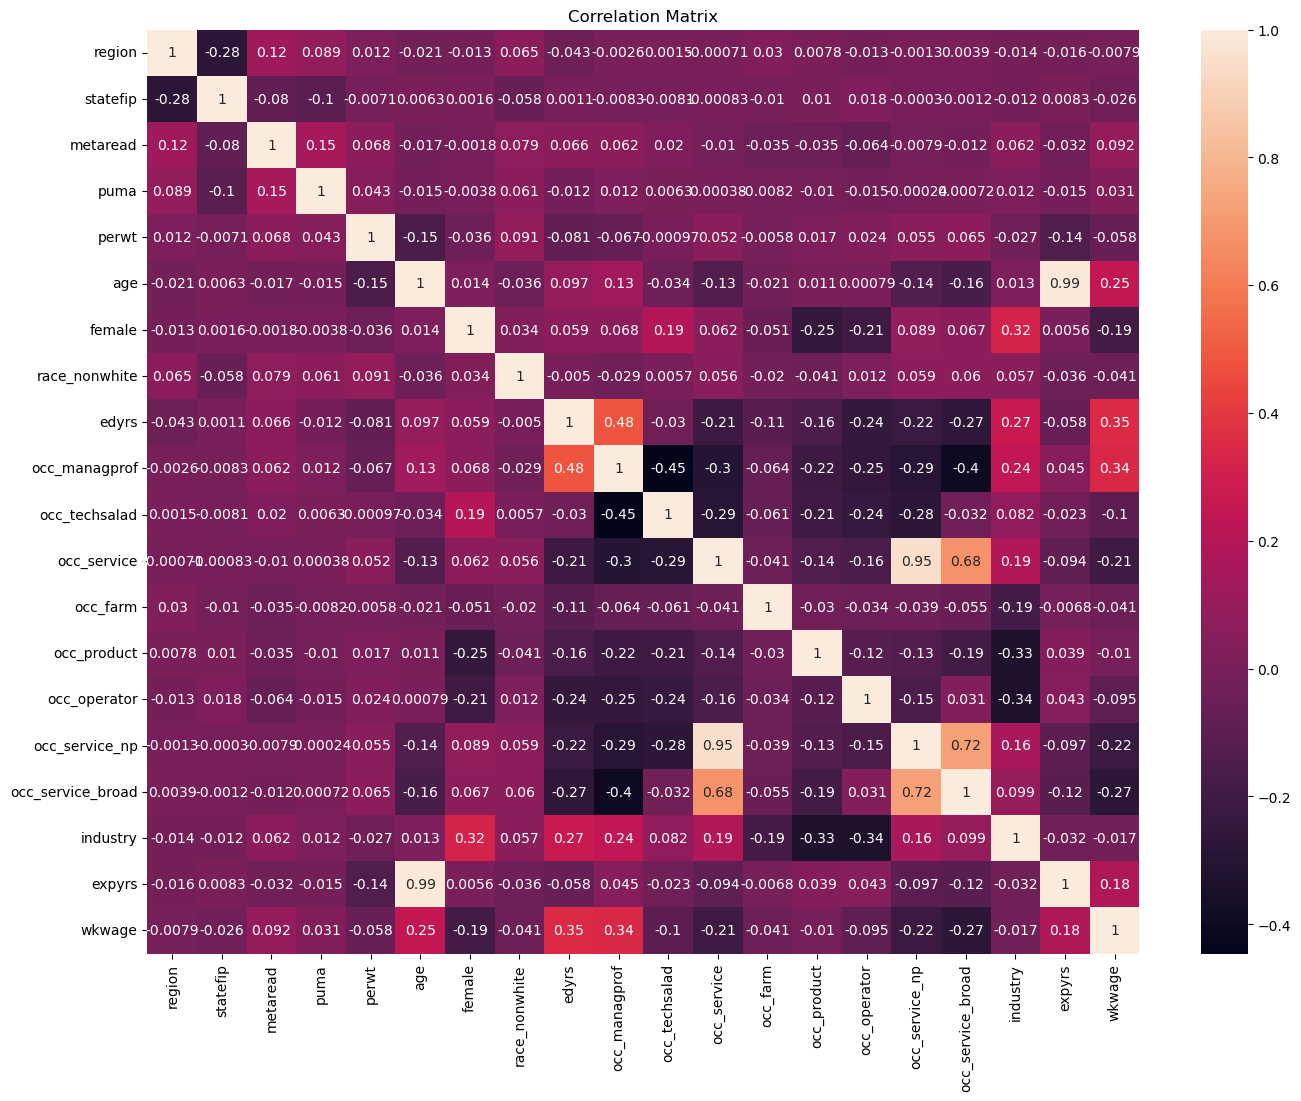

In [22]:
# heatmap

plt.figure(figsize=(16,12))
correlation_matrix = df_microwage.corr()
sn.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

To learn the magnitude and the direction(postive or negative)of the realationship between these variables we used corr() function and also heatmap fuction from seaborn . It is clear from the numbers and the heatmap that edyrs is the only variable having some coniderable correlation with wkwage with a postive of 0.345387 units. We know that correlation ranges from -1 to +1 , +1 indicating the perfect postive correlation and -1 indicating the perfect negative correlation. It is clear from the heatmap that age and expyrs are highly correlated (0.99)


## 1.3 Outlier Analysis

### 1.3.1 Analysis using box plot 

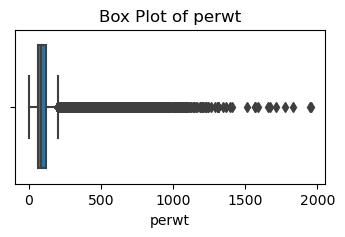

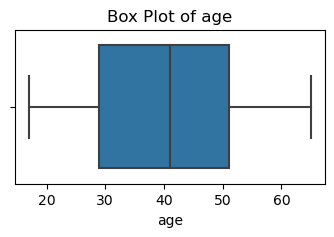

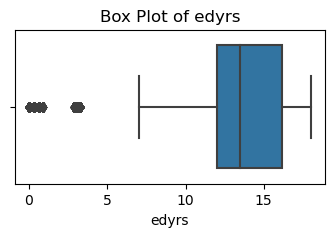

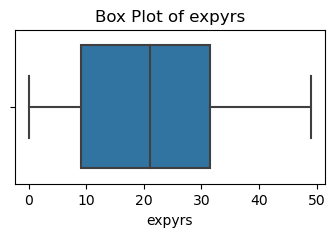

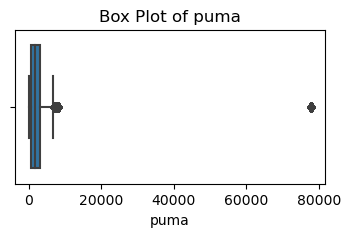

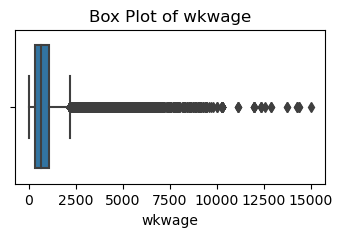

In [23]:

for column in quantitative_data:
    plt.figure(figsize=(4, 2))                  
    sn.boxplot(x=df_microwage[column])              #plotting box-plot to check
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()
    

[2.20588231086731, 2170.0]
[350.0, 1078.43139648438]


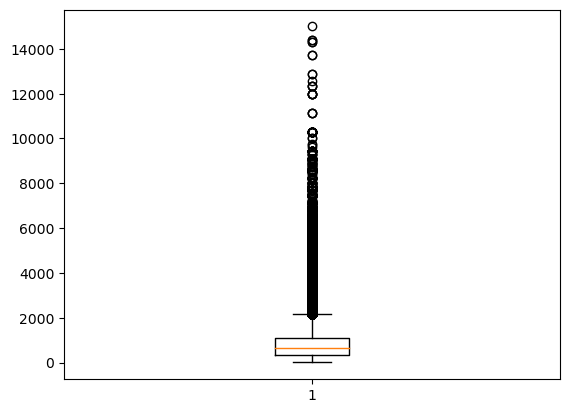

In [24]:
box = plt.boxplot(df_microwage['wkwage'])
print([item.get_ydata()[0] for item in box['caps']])
print([item.get_ydata()[0] for item in box['whiskers']])



Based on the box plot of wkwage and the values i get after iterating over the caps , i see min and mx values . Max value observered in the data is much greater than the value calculated by box plot which suggests that the whisker endpoint may not accurately capture the true maximum value in your data. Outliers may extend the whiskers beyond the typical range of values. We need to consider whether the values beyond the whiskers are genuine outliers or if they represent valid data points that should be included in the analysis.

The whiskers key in the box variables , returns the values of the distribution at 25 an 75 quantiles (350.0, 1078.43139648438)
So the IQR range is (728.43139648438)

while skewness can indicate asymmetry in the data distribution, it does not necessarily imply the presence of outliers. 

So, to understand the variability of the data and the existence of outliers , blox plot is being used here.

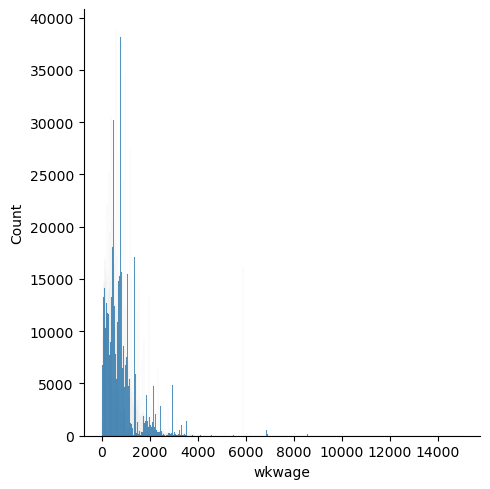

In [25]:
import seaborn as sn
sn.displot(df_microwage['wkwage'])

Using seaborn's displot function to see the distribution over a continous interval . Density plot is the smoothened version of the histogram 

In [26]:
df_microwage[df_microwage['wkwage'] > 2170.0]   #checking the entries which seems to be the outliers from the box plot 

,region,statefip,metaread,puma,perwt,age,female,race_nonwhite,edyrs,occ_managprof,occ_techsalad,occ_service,occ_farm,occ_product,occ_operator,occ_service_np,occ_service_broad,industry,expyrs,wkwage
8,42,6,7120,2900,73,42,0,0,16.170000,1,0,0,0,0,0,0,0,10,19.830000,3901.960938
30,42,6,7480,2801,79,63,0,0,17.680000,1,0,0,0,0,0,0,0,10,39.320000,5882.353027
194,42,6,7120,2900,90,40,1,0,12.000000,0,0,0,1,0,0,0,0,10,22.000000,3142.856934
233,31,37,0,4500,78,53,0,0,9.920000,0,0,0,1,0,0,0,0,10,37.000000,5882.353027
256,12,42,6160,4303,114,43,1,0,17.639999,1,0,0,0,0,0,0,0,10,19.360001,3333.333252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349210,31,51,8840,600,65,51,1,0,16.150000,1,0,0,0,0,0,0,0,932,28.850000,2823.529297
1349215,42,6,4482,7601,95,55,0,0,16.170000,1,0,0,0,0,0,0,0,932,32.830002,5882.353027
1349217,31,51,8840,502,64,55,0,0,17.709999,1,0,0,0,0,0,0,0,932,31.290001,2960.784424
1349222,31,12,5000,4019,171,44,0,1,13.570000,1,0,0,0,0,0,0,0,932,24.430000,2941.176514


Also , it is important for us to note that Income distributions often exhibit right-skewness, where the majority of individuals earn lower wages, but there are relatively fewer individuals with very high wages. This pattern can result in right skewness in the distribution.

### 1.3.2 Analysis using z -scores 

In [27]:

#Z-score : A standard score which measures how many standard deviation an observation is from the mean of the dataset,In practice z-scores more than 3 are considered as Potential outliers

from scipy.stats import zscore

df_microwage['wkwage_zscore'] = zscore(df_microwage.wkwage)
df_microwage[(df_microwage.wkwage_zscore > 3.0) | (df_microwage.wkwage_zscore) < -3.0]    


,region,statefip,metaread,puma,perwt,age,female,race_nonwhite,edyrs,occ_managprof,...,occ_service,occ_farm,occ_product,occ_operator,occ_service_np,occ_service_broad,industry,expyrs,wkwage,wkwage_zscore


According to the Z-score there are no observations that are outliers . Z-score may not be sufficient to come to this conclusion , as z-score is not so suitable technique since it assumes a normal distribution of data. May not be effective for detecting outliers in non-normal distributions.So, we are going to consider Cooks's distance and Leverage Values during model building for a  comprehensive outlier analysis.

# 2. Model building 

## 2.1 Model 1 (Using Ols)

In [28]:
#building model_1
import statsmodels.api as sm
x = df_microwage[['region',
 'statefip',
 'metaread',
 'puma',
 'perwt',
 'age',
 'female',
 'race_nonwhite',
 'edyrs',
 'occ_managprof',
 'occ_techsalad',
 'occ_service',
 'occ_farm',
 'occ_product',
 'occ_operator',
 'occ_service_np',
 'occ_service_broad',
 'industry',
 'expyrs']]
X = sm.add_constant(x)
Y = df_microwage['wkwage']
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,train_size=0.8,random_state=100)
model_1 = sm.OLS(train_y,train_x).fit()
model_1.params

const               -1280.044677
region                 -1.209206
statefip               -1.109590
metaread                0.017164
puma                    0.007583
perwt                  -0.055323
age                   135.224139
female               -350.188558
race_nonwhite         -45.614716
edyrs                 -15.987308
occ_managprof          97.923004
occ_techsalad        -181.789454
occ_service            66.755847
occ_farm             -579.592130
occ_product          -305.459418
occ_operator         -377.882526
occ_service_np       -333.270577
occ_service_broad    -111.358016
industry               -0.347946
expyrs               -123.321318
dtype: float64

model can be written as wkwage = -1280.044677 + (all the features with their co-efficients). meaning that , for every 1 percent increase in any of the features , the salary will be the increased  by their co-effiecient  value (assuming all the features are on the same scale )

Y = β0 + β1x + ε

In [29]:
model_1.summary2()   # diagnosing the model 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                OLS                Adj. R-squared:       0.280        
Dependent Variable:   wkwage             AIC:                  17328397.3325
Date:                 2024-03-25 20:55   BIC:                  17328623.2790
No. Observations:     1079406            Log-Likelihood:       -8.6642e+06  
Df Model:             18                 F-statistic:          2.336e+04    
Df Residuals:         1079387            Prob (F-statistic):   0.00         
R-squared:            0.280              Scale:                5.4894e+05   
----------------------------------------------------------------------------
                    Coef.    Std.Err.     t     P>|t|    [0.025     0.975]  
----------------------------------------------------------------------------
const             -1280.0447   9.4469 -135.4986 0.0000 -1298.5603 -1261.5290
region               -1.2092   0.0726  -16.6589 0.0000    -1.3515    -1.0669
statefip             -1.1096   0.0470  -23.6237 0.0000    -1.2016    -1.0175
metaread              0.0172   0.0002   69.3487 0.0000     0.0167     0.0176
puma                  0.0076   0.0003   25.0151 0.0000     0.0070     0.0082
perwt                -0.0553   0.0098   -5.6471 0.0000    -0.0745    -0.0361
age                 135.2241   0.9545  141.6642 0.0000   133.3533   137.0950
female             -350.1886   1.5744 -222.4333 0.0000  -353.2742  -347.1029
race_nonwhite       -45.6147   1.9730  -23.1196 0.0000   -49.4817   -41.7477
edyrs               -15.9873   0.7686  -20.8016 0.0000   -17.4937   -14.4810
occ_managprof        97.9230   3.0163   32.4645 0.0000    92.0111   103.8349
occ_techsalad      -181.7895   2.5697  -70.7427 0.0000  -186.8260  -176.7529
occ_service          66.7558   5.8499   11.4115 0.0000    55.2903    78.2214
occ_farm           -579.5921   6.9777  -83.0639 0.0000  -593.2681  -565.9161
occ_product        -305.4594   2.8335 -107.8012 0.0000  -311.0131  -299.9058
occ_operator       -377.8825   2.7170 -139.0812 0.0000  -383.2077  -372.5573
occ_service_np     -333.2706   7.0185  -47.4847 0.0000  -347.0266  -319.5146
occ_service_broad  -111.3580   2.5752  -43.2419 0.0000  -116.4054  -106.3106
industry             -0.3479   0.0034 -103.8643 0.0000    -0.3545    -0.3414
expyrs             -123.3213   0.9591 -128.5759 0.0000  -125.2012  -121.4415
----------------------------------------------------------------------------
Omnibus:            813832.506      Durbin-Watson:         2.002            
Prob(Omnibus):      0.000           Jarque-Bera (JB):      19688441.488     
Skew:               3.450           Prob(JB):              0.000            
Kurtosis:           22.752          Condition No.:         37290565671568976
============================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The smallest eigenvalue is 1.98e-20. This might indicate that
there are strong multicollinearity problems or that the design
matrix is singular.
"""

To check the goodness of fit , we can take the following measures :
1 .Co-efficient of determination (R-squared value)
2 .Hypothesis test for the regression co-efficient : Regression co-efficient captures the existence of linear relationship between a feature and the outcome variable , if say beta1= 0 , means that there no statistical significance between them 
3 .Analysis of variance for overall model validity 
4 .Residual analysis to validate the regression model assumptions 
5 .Outlier analysis


1.Here from the model summary we see that the R-squared value is 0.280 ,meaning that model explains 28 percent of variation in the wkwage
2.Also from the summary we see that all the p-values are near to 0,  indicating that there is strong evidence to reject the null hypothesis, implying that all the corresponding features are statistically significant in predicting the outcome variable

This is not very intuitive and can also be due to the presence of multicollinearity . This multicollinearity can impact the model in many ways .

So do more analysis on this calculating the Variance inflation factor , which is a measure used for identifying the existence of multicollinearity if any. square-root(VIF) is the value by which the t-statistic value is deflated .VIF value greater than 4 requires further analysis to assess the impact of multicollinearity .

In [30]:
#writing a simple user defined function to calculate the VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_factors (X):
    X_matrix = X.values
    vif = [variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [31]:
vif_results = vif_factors(x)
vif_results

,column,VIF
0,region,1.105658
1,statefip,1.095136
2,metaread,1.060286
3,puma,1.038664
4,perwt,1.044313
5,age,310.242637
6,female,1.218093
7,race_nonwhite,1.029102
8,edyrs,7.901101
9,occ_managprof,85.039116


From the above table we can observe that  VIF value of ~310 (for age) and ~307 (for expyrs ) which means that the variance of the coefficient estimate for the variable "age" and "expyrs" are inflated by a factor of 310 and 307 due to multicollinearity. In other words, the presence of such variables in the model are  causing high variability in the estimation of its coefficient because they are highly correlated with other variables.

Such hig VIF values lead to unreliable coefficient estimates and inflated standard errors. It's essential to analyse more of multicollinearity and consider potential solutions, such as removing highly correlated features, combining correlated features, or using regularization techniques like ridge regression.



In [32]:
columns_with_vif_morethan4 = vif_results[vif_results['VIF'] > 4].column
columns_with_vif_morethan4

5                age
8              edyrs
9      occ_managprof
10     occ_techsalad
11       occ_service
13       occ_product
14      occ_operator
15    occ_service_np
18            expyrs
Name: column, dtype: object

The above shown are the columns with VIF more than 4 .Even though we have already seen the heatmap , let us plot one more heatmap for features having VIF values of more than 4. Since We have the least domain knowledge of the dataset given  , sticking to the rule of thumb and the hence the threshold 4 

<Axes: >

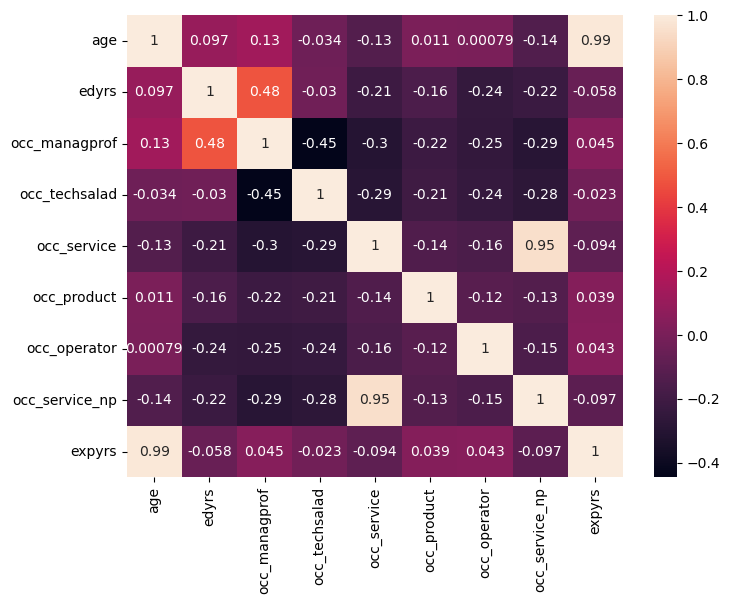

In [33]:
plt.figure(figsize=(8,6))
sn.heatmap(x[columns_with_vif_morethan4].corr(),annot=True)

From the above heatmap , we observe that features like age ,expyrs and occ_service , occ_service_np have collinearity of 0.99 and 0.95 respectively . We know that colinearity ranges from (-1 to +1).

In [34]:
x1 = x.drop(columns=['age','occ_service_np'])
x1

,region,statefip,metaread,puma,perwt,female,race_nonwhite,edyrs,occ_managprof,occ_techsalad,occ_service,occ_farm,occ_product,occ_operator,occ_service_broad,industry,expyrs
0,42,6,5170,2601,74,0,0,11.99,0,0,0,0,0,1,0,10,1.010000
1,21,26,3720,2602,37,0,0,3.19,0,0,0,0,0,1,0,10,11.000000
2,42,6,680,3901,91,0,0,11.99,0,0,1,0,0,0,1,10,12.010000
3,42,6,6780,7802,219,1,0,13.35,0,0,0,1,0,0,0,10,1.650000
4,42,6,7470,6701,55,1,0,7.23,0,0,0,1,0,0,0,10,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349253,12,36,5600,4010,243,0,1,13.57,0,0,0,0,1,0,0,932,7.430000
1349254,31,24,8840,1105,108,0,0,14.23,1,0,0,0,0,0,0,932,27.770000
1349255,21,17,1600,3203,92,0,0,14.23,0,1,0,0,0,0,0,932,2.770000
1349256,31,24,720,400,67,0,0,17.68,0,0,1,0,0,0,1,932,32.320000


Two avoid multi-collinearity , we can keep only one variable from each group of highly correlated variables and remove others.

In [35]:
vif_results2 = vif_factors(x1)
vif_results2

,column,VIF
0,region,1.105342
1,statefip,1.094753
2,metaread,1.057149
3,puma,1.037880
4,perwt,1.044258
5,female,1.198323
6,race_nonwhite,1.028773
7,edyrs,1.453174
8,occ_managprof,27.556252
9,occ_techsalad,22.381319


In [36]:
columns_with_vif_morethan4 = vif_results2[vif_results2['VIF'] > 4].column
columns_with_vif_morethan4

8     occ_managprof
9     occ_techsalad
10      occ_service
12      occ_product
13     occ_operator
Name: column, dtype: object

<Axes: >

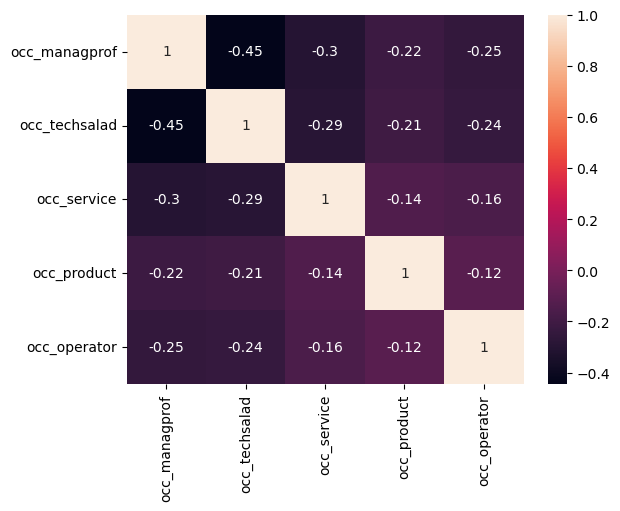

In [37]:
sn.heatmap(x[columns_with_vif_morethan4].corr(),annot=True)

Again checking VIF for the new set of features we found that there is no significant collinearity within them so we can proceed with the model building to check the model statistics.

## 2.2 Model 2 (After Dropping correlated variables)

In [38]:
X1 = sm.add_constant(x1)
Y = df_microwage['wkwage']
train_x,test_x,train_y,test_y = train_test_split(X1,Y,train_size=0.8,random_state=100)
model_2 = sm.OLS(train_y,train_x).fit()
model_2.params

const               -203.648935
region                -1.032072
statefip              -1.233745
metaread               0.018893
puma                   0.008824
perwt                 -0.064684
female              -367.976889
race_nonwhite        -44.133637
edyrs                 83.069378
occ_managprof        358.208941
occ_techsalad         30.934572
occ_service            4.502938
occ_farm            -309.321944
occ_product         -117.115190
occ_operator        -170.858253
occ_service_broad   -177.819982
industry              -0.309184
expyrs                12.343571
dtype: float64

In [39]:
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:               OLS               Adj. R-squared:      0.265        
Dependent Variable:  wkwage            AIC:                 17350477.9426
Date:                2024-03-25 20:56  BIC:                 17350680.1053
No. Observations:    1079406           Log-Likelihood:      -8.6752e+06  
Df Model:            16                F-statistic:         2.438e+04    
Df Residuals:        1079389           Prob (F-statistic):  0.00         
R-squared:           0.265             Scale:               5.6029e+05   
-------------------------------------------------------------------------
                    Coef.   Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------------
const             -203.6489   5.0920  -39.9938 0.0000 -213.6291 -193.6688
region              -1.0321   0.0733  -14.0759 0.0000   -1.1758   -0.8884
statefip            -1.2337   0.0474  -26.0042 0.0000   -1.3267   -1.1408
metaread             0.0189   0.0002   75.6688 0.0000    0.0184    0.0194
puma                 0.0088   0.0003   28.8262 0.0000    0.0082    0.0094
perwt               -0.0647   0.0099   -6.5356 0.0000   -0.0841   -0.0453
female            -367.9769   1.5777 -233.2400 0.0000 -371.0691 -364.8847
race_nonwhite      -44.1336   1.9929  -22.1450 0.0000  -48.0397  -40.2275
edyrs               83.0694   0.3321  250.1001 0.0000   82.4184   83.7204
occ_managprof      358.2089   2.4871  144.0270 0.0000  353.3343  363.0836
occ_techsalad       30.9346   2.1128   14.6417 0.0000   26.7936   35.0755
occ_service          4.5029   2.8918    1.5571 0.1194   -1.1649   10.1708
occ_farm          -309.3219   6.8027  -45.4702 0.0000 -322.6551 -295.9888
occ_product       -117.1152   2.5449  -46.0187 0.0000 -122.1032 -112.1272
occ_operator      -170.8583   2.2895  -74.6275 0.0000 -175.3456 -166.3709
occ_service_broad -177.8200   2.4168  -73.5779 0.0000 -182.5567 -173.0832
industry            -0.3092   0.0034  -92.0717 0.0000   -0.3158   -0.3026
expyrs              12.3436   0.0565  218.5557 0.0000   12.2329   12.4543
-------------------------------------------------------------------------
Omnibus:           813061.447     Durbin-Watson:        2.002            
Prob(Omnibus):     0.000          Jarque-Bera (JB):     19216882.401     
Skew:              3.455          Prob(JB):             0.000            
Kurtosis:          22.482         Condition No.:        37308668741807088
=========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The smallest eigenvalue is 1.98e-20. This might indicate that
there are strong multicollinearity problems or that the design
matrix is singular.
"""

After removing certain columns based on multicollinearity ,we observe from the summary that the r square value even dropped further.Meaning that the dropped columns were contributing to the model's predictive power, even if they were collinear with the other independent variables.

We can address this issue by exploring techniques such as 
1.Feature engineering where  instead of dropping columns, You can combine or transform existing features to capture important information while reducing collinearity.
2.Data Preprocessing Re-check to review the preprocessing steps applied to the data such as  scaling, encoding categorical variables, to ensure they are appropriate and consistent with the model assumptions ,etc.

But we also see that p-value of occ_service is not less tha 0.05 , so dropping to see the model results again, could be the next step before jumping to any other transformations 

In [40]:
significant_var = x1.drop(columns=['occ_service'])

In [41]:
significant_var

,region,statefip,metaread,puma,perwt,female,race_nonwhite,edyrs,occ_managprof,occ_techsalad,occ_farm,occ_product,occ_operator,occ_service_broad,industry,expyrs
0,42,6,5170,2601,74,0,0,11.99,0,0,0,0,1,0,10,1.010000
1,21,26,3720,2602,37,0,0,3.19,0,0,0,0,1,0,10,11.000000
2,42,6,680,3901,91,0,0,11.99,0,0,0,0,0,1,10,12.010000
3,42,6,6780,7802,219,1,0,13.35,0,0,1,0,0,0,10,1.650000
4,42,6,7470,6701,55,1,0,7.23,0,0,1,0,0,0,10,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349253,12,36,5600,4010,243,0,1,13.57,0,0,0,1,0,0,932,7.430000
1349254,31,24,8840,1105,108,0,0,14.23,1,0,0,0,0,0,932,27.770000
1349255,21,17,1600,3203,92,0,0,14.23,0,1,0,0,0,0,932,2.770000
1349256,31,24,720,400,67,0,0,17.68,0,0,0,0,0,1,932,32.320000


## 2.3 Model 3 ( Considering significant Variables)

In [42]:
X2 = sm.add_constant(significant_var)
Y = df_microwage['wkwage']
train_x,test_x,train_y,test_y = train_test_split(X2,Y,train_size=0.8,random_state=100)
model_3 = sm.OLS(train_y,train_x).fit()
model_3.params

const               -199.145997
region                -1.032072
statefip              -1.233745
metaread               0.018893
puma                   0.008824
perwt                 -0.064684
female              -367.976889
race_nonwhite        -44.133637
edyrs                 83.069378
occ_managprof        353.706003
occ_techsalad         26.431633
occ_farm            -313.824882
occ_product         -121.618128
occ_operator        -175.361192
occ_service_broad   -177.819982
industry              -0.309184
expyrs                12.343571
dtype: float64

In [43]:
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:               OLS               Adj. R-squared:      0.265        
Dependent Variable:  wkwage            AIC:                 17350477.9426
Date:                2024-03-25 20:56  BIC:                 17350680.1053
No. Observations:    1079406           Log-Likelihood:      -8.6752e+06  
Df Model:            16                F-statistic:         2.438e+04    
Df Residuals:        1079389           Prob (F-statistic):  0.00         
R-squared:           0.265             Scale:               5.6029e+05   
-------------------------------------------------------------------------
                    Coef.   Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------------
const             -199.1460   6.5905  -30.2171 0.0000 -212.0632 -186.2288
region              -1.0321   0.0733  -14.0759 0.0000   -1.1758   -0.8884
statefip            -1.2337   0.0474  -26.0042 0.0000   -1.3267   -1.1408
metaread             0.0189   0.0002   75.6688 0.0000    0.0184    0.0194
puma                 0.0088   0.0003   28.8262 0.0000    0.0082    0.0094
perwt               -0.0647   0.0099   -6.5356 0.0000   -0.0841   -0.0453
female            -367.9769   1.5777 -233.2400 0.0000 -371.0691 -364.8847
race_nonwhite      -44.1336   1.9929  -22.1450 0.0000  -48.0397  -40.2275
edyrs               83.0694   0.3321  250.1001 0.0000   82.4184   83.7204
occ_managprof      353.7060   3.2249  109.6813 0.0000  347.3854  360.0266
occ_techsalad       26.4316   2.7925    9.4651 0.0000   20.9584   31.9049
occ_farm          -313.8249   8.5476  -36.7149 0.0000 -330.5779 -297.0718
occ_product       -121.6181   3.9298  -30.9480 0.0000 -129.3203 -113.9159
occ_operator      -175.3612   3.3671  -52.0807 0.0000 -181.9606 -168.7618
occ_service_broad -177.8200   2.4168  -73.5779 0.0000 -182.5567 -173.0832
industry            -0.3092   0.0034  -92.0717 0.0000   -0.3158   -0.3026
expyrs              12.3436   0.0565  218.5557 0.0000   12.2329   12.4543
-------------------------------------------------------------------------
Omnibus:              813061.447      Durbin-Watson:         2.002       
Prob(Omnibus):        0.000           Jarque-Bera (JB):      19216882.401
Skew:                 3.455           Prob(JB):              0.000       
Kurtosis:             22.482          Condition No.:         66649       
=========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 6.66e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

From the latest model , we can see that all the varibles seems to significant in capturing the variation in the dependent variable.

## 2.4 Model 4 (Log Transformation)

In [44]:
#transformation of the response variable 
import numpy as np
log_y = np.log(Y)
log_y

0          4.531062
1          5.278515
2          6.249294
3          6.194805
4          4.921840
             ...   
1349253    5.490689
1349254    7.629890
1349255    5.971662
1349256    6.419548
1349257    6.559449
Name: wkwage, Length: 1349258, dtype: float64

Based on the distribution that we observed in the histogram of the response variable , the skewness of the distribution can be mitigated by using  Logarithmic transformation , which compresses the range of large values more effectively , which can help achieve a more symmetrical distribution.
Since our "wkwage" variable represents monetary values or other quantities that are naturally exponential in nature ,the natural logarithm transformation over base-10 is more appropriate. So we transformed our response variable using natural log .

We have considered to transform the dependent variable to mitigate the following problems .
1. Poor fit 
2. Pattern in residual analysis showing the signs of potential non-linear relationship b/n dependent and the independent variables
3. Residuals not following the normal distribution
4. Residuals are not homoscedastic

<Axes: xlabel='wkwage', ylabel='Count'>

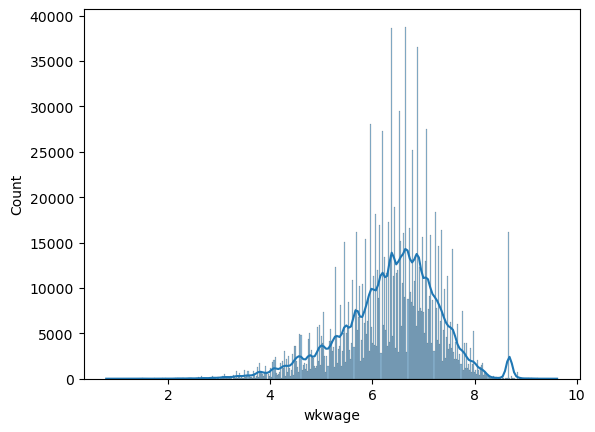

In [45]:
sn.histplot(log_y,kde=True) 

Plotting histogram on the tranformed output shows symmetric distribution of "wkwage" .

In [46]:
Y1 = log_y
train_x,test_x,train_y,test_y = train_test_split(X,Y1,train_size=0.8,random_state=100)
model_4 = sm.OLS(train_y,train_x).fit()
model_4.params

const                3.061815
region              -0.000617
statefip            -0.001058
metaread             0.000016
puma                 0.000006
perwt                0.000188
age                  0.156157
female              -0.337013
race_nonwhite       -0.027213
edyrs               -0.019747
occ_managprof        0.767969
occ_techsalad        0.478800
occ_service          0.961761
occ_farm            -0.024023
occ_product          0.504432
occ_operator         0.372876
occ_service_np      -0.613037
occ_service_broad   -0.299831
industry            -0.000405
expyrs              -0.136954
dtype: float64

In [47]:
model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS              Adj. R-squared:     0.378       
Dependent Variable: wkwage           AIC:                2431258.3137
Date:               2024-03-25 20:56 BIC:                2431484.2603
No. Observations:   1079406          Log-Likelihood:     -1.2156e+06 
Df Model:           18               F-statistic:        3.646e+04   
Df Residuals:       1079387          Prob (F-statistic): 0.00        
R-squared:          0.378            Scale:              0.55683     
---------------------------------------------------------------------
                     Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                3.0618   0.0095  321.8024 0.0000  3.0432  3.0805
region              -0.0006   0.0001   -8.4337 0.0000 -0.0008 -0.0005
statefip            -0.0011   0.0000  -22.3615 0.0000 -0.0012 -0.0010
metaread             0.0000   0.0000   66.1248 0.0000  0.0000  0.0000
puma                 0.0000   0.0000   20.1763 0.0000  0.0000  0.0000
perwt                0.0002   0.0000   19.0944 0.0000  0.0002  0.0002
age                  0.1562   0.0010  162.4305 0.0000  0.1543  0.1580
female              -0.3370   0.0016 -212.5424 0.0000 -0.3401 -0.3339
race_nonwhite       -0.0272   0.0020  -13.6948 0.0000 -0.0311 -0.0233
edyrs               -0.0197   0.0008  -25.5110 0.0000 -0.0213 -0.0182
occ_managprof        0.7680   0.0030  252.7949 0.0000  0.7620  0.7739
occ_techsalad        0.4788   0.0026  184.9981 0.0000  0.4737  0.4839
occ_service          0.9618   0.0059  163.2388 0.0000  0.9502  0.9733
occ_farm            -0.0240   0.0070   -3.4183 0.0006 -0.0378 -0.0102
occ_product          0.5044   0.0029  176.7557 0.0000  0.4988  0.5100
occ_operator         0.3729   0.0027  136.2625 0.0000  0.3675  0.3782
occ_service_np      -0.6130   0.0071  -86.7249 0.0000 -0.6269 -0.5992
occ_service_broad   -0.2998   0.0026 -115.6008 0.0000 -0.3049 -0.2947
industry            -0.0004   0.0000 -120.1253 0.0000 -0.0004 -0.0004
expyrs              -0.1370   0.0010 -141.7737 0.0000 -0.1388 -0.1351
---------------------------------------------------------------------
Omnibus:           145993.842   Durbin-Watson:      2.001            
Prob(Omnibus):     0.000        Jarque-Bera (JB):   336639.799       
Skew:              -0.800       Prob(JB):           0.000            
Kurtosis:          5.220        Condition No.:      37290565671568976
=====================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
[2] The smallest eigenvalue is 1.98e-20. This might indicate that
there are strong multicollinearity problems or that the design
matrix is singular.
"""

In the summary of model_4 we can see the substantial improvement in our R -square value after tranforming the response variable .

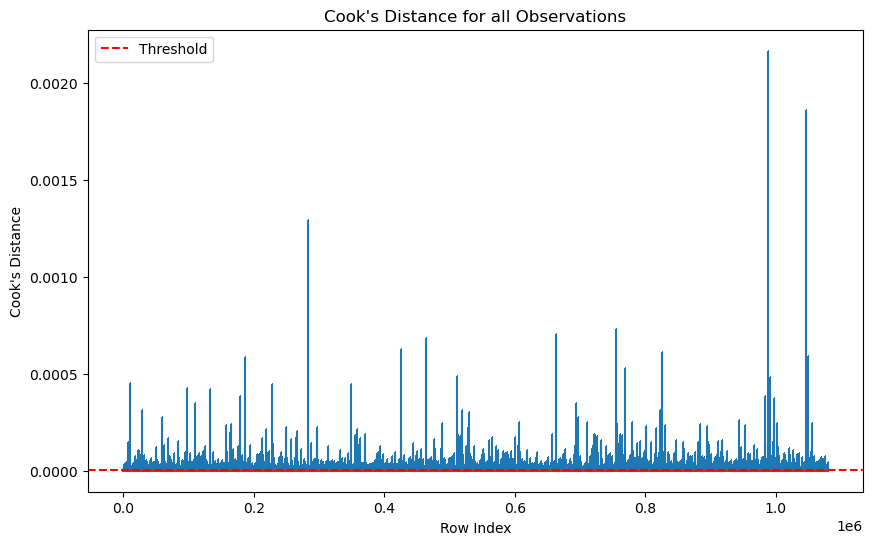

In [48]:
from statsmodels.graphics.regressionplots import influence_plot
# Calculating threshold from the formulae   (4/n-k-1)  n is sample size k is num of predictors 
# train_x.shape   gives n and k
threshold = 4 / (1079406 - 20 - 1) 

# Get the influence information
influence = model_4.get_influence()

# Extract Cook's distance
cook_distance = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(train_x)), cook_distance, markerfmt=",")
plt.axhline(threshold, color='r', linestyle='--', label='Threshold')
plt.title("Cook's Distance for all Observations")
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

We can see from the figure Cook's distances for the row indices are much above the threshold suggesting that none of the observations have a particularly high influence on the model. In other words, there are no individual data points that significantly affect the model's parameter estimates or predictions according to Cook's distance.

This result indicates that the observations in our dataset are relatively balanced in terms of their influence on the model. It's a positive sign, suggesting that no single observation is unduly influencing the model's behavior.

However to ensure the robustness and reliability of our model ,considering Leverage values. 

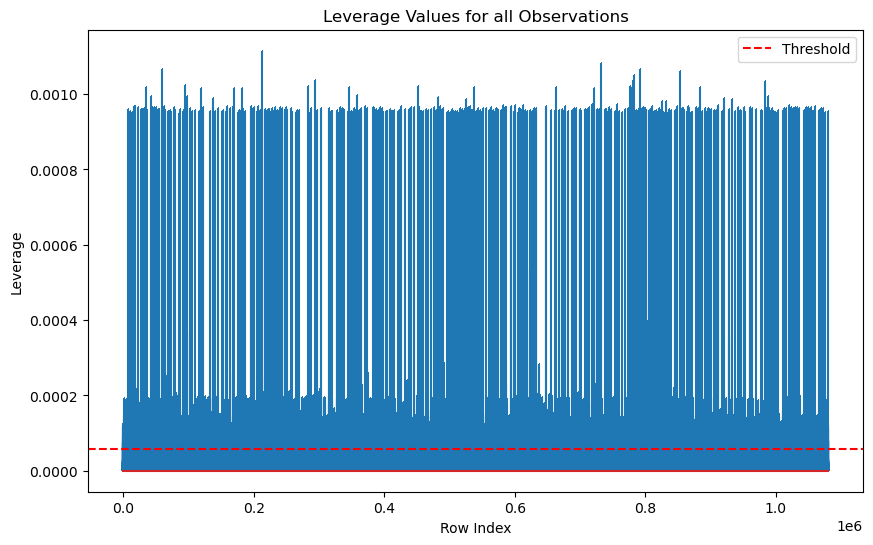

In [49]:
from statsmodels.graphics.regressionplots import influence_plot
k = train_x.shape[1]
n = train_x.shape[0]

lev_threshold = 3 * ((k+1)/n)

leverage = influence.hat_matrix_diag
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(train_x)), leverage, markerfmt=",")
plt.axhline(lev_threshold, color='r', linestyle='--', label='Threshold')
plt.title("Leverage Values for all Observations")
plt.xlabel("Row Index")
plt.ylabel("Leverage")
plt.legend()
plt.show()


In Ordinary Least Square estimate , we assume that each record in the data has equal influence on the regression coefficients, which may not be always true.
Finding influencers using the function influence_plot() .Levarage value of an obervation is used to measure the influence of that observation on the overall fit of the regression function . Leverage values of more than 3(k+1)/n is treated as highly influential observation where ,k is the number of variables in the model and n is the sample size


We can see from the figure that leverage values for the row indices are much above the leverage-cutoff and evenly spread, it suggests that all observations in our dataset have a relatively high influence on the model. In other words, each data point has a significant impact on the estimation of the model parameters.

In observational research, it is often difficult to sample uniformly across the predictor space, and you might have just a few points in a given area. Such points can diverge from the rest. Having a few, distinct cases can be discomfiting, but merit considerable thought before being relegated outliers. There may legitimately be an interaction amongst the predictors, or the system may shift to behave differently when predictor values become extreme. In addition, they may be able to help you untangle the effects of colinear predictors. Influential points could be a blessing in disguise.

One basic assumption of a linear model is that there is a linear relationship between their dependent and independent variables which is not so true with the given dataset . Addiionally non-linear models may capture complex relationships between variables more efficiently than linear models , potentially improving the overall model performance

## 2.5 Model 5 (Cube-root transformation )

In [50]:
cuberoot_y = np.cbrt(Y)
cuberoot_y

0           4.528334
1           5.809560
2           8.029304
3           7.884787
4           5.158332
             ...    
1349253     6.235319
1349254    12.721540
1349255     7.319587
1349256     8.498156
1349257     8.903842
Name: wkwage, Length: 1349258, dtype: float64

In [51]:
Y2 = cuberoot_y
train_x,test_x,train_y,test_y = train_test_split(X,Y2,train_size=0.8,random_state=100)
model_5 = sm.OLS(train_y,train_x).fit()
model_5.params

const                0.692571
region              -0.002748
statefip            -0.003319
metaread             0.000052
puma                 0.000020
perwt                0.000199
age                  0.445294
female              -1.056383
race_nonwhite       -0.105014
edyrs               -0.049114
occ_managprof        0.990722
occ_techsalad        0.082471
occ_service          1.345948
occ_farm            -1.358356
occ_product         -0.004737
occ_operator        -0.363477
occ_service_np      -1.616682
occ_service_broad   -0.688162
industry            -0.001172
expyrs              -0.395740
dtype: float64

In [52]:
model_5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS              Adj. R-squared:     0.388       
Dependent Variable: wkwage           AIC:                4623342.3184
Date:               2024-03-25 20:57 BIC:                4623568.2649
No. Observations:   1079406          Log-Likelihood:     -2.3117e+06 
Df Model:           18               F-statistic:        3.800e+04   
Df Residuals:       1079387          Prob (F-statistic): 0.00        
R-squared:          0.388            Scale:              4.2433      
---------------------------------------------------------------------
                     Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                0.6926   0.0263   26.3686 0.0000  0.6411  0.7440
region              -0.0027   0.0002  -13.6150 0.0000 -0.0031 -0.0024
statefip            -0.0033   0.0001  -25.4198 0.0000 -0.0036 -0.0031
metaread             0.0001   0.0000   75.7299 0.0000  0.0001  0.0001
puma                 0.0000   0.0000   24.0313 0.0000  0.0000  0.0000
perwt                0.0002   0.0000    7.3161 0.0000  0.0001  0.0003
age                  0.4453   0.0027  167.7900 0.0000  0.4401  0.4505
female              -1.0564   0.0044 -241.3416 0.0000 -1.0650 -1.0478
race_nonwhite       -0.1050   0.0055  -19.1441 0.0000 -0.1158 -0.0943
edyrs               -0.0491   0.0021  -22.9845 0.0000 -0.0533 -0.0449
occ_managprof        0.9907   0.0084  118.1377 0.0000  0.9743  1.0072
occ_techsalad        0.0825   0.0071   11.5432 0.0000  0.0685  0.0965
occ_service          1.3459   0.0163   82.7554 0.0000  1.3141  1.3778
occ_farm            -1.3584   0.0194  -70.0190 0.0000 -1.3964 -1.3203
occ_product         -0.0047   0.0079   -0.6013 0.5477 -0.0202  0.0107
occ_operator        -0.3635   0.0076  -48.1173 0.0000 -0.3783 -0.3487
occ_service_np      -1.6167   0.0195  -82.8502 0.0000 -1.6549 -1.5784
occ_service_broad   -0.6882   0.0072  -96.1141 0.0000 -0.7022 -0.6741
industry            -0.0012   0.0000 -125.8293 0.0000 -0.0012 -0.0012
expyrs              -0.3957   0.0027 -148.4033 0.0000 -0.4010 -0.3905
---------------------------------------------------------------------
Omnibus:          83016.038    Durbin-Watson:       2.001            
Prob(Omnibus):    0.000        Jarque-Bera (JB):    244745.115       
Skew:             0.411        Prob(JB):            0.000            
Kurtosis:         5.183        Condition No.:       37290565671568976
=====================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
[2] The smallest eigenvalue is 1.98e-20. This might indicate that
there are strong multicollinearity problems or that the design
matrix is singular.
"""


Also ,tried transforming  response variable using square root , and the model was able to explain 36% of the variation in the data which is lesser than that of model_4.

Further ,with cube root tranformation , We saw an increase of 1 percent in R-sqaured value for model_5 (~39 % ,which is obtained after cube root transorformation of the response variable .

# Non linear modeling

In [53]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVR
# from sklearn.metrics import r2_score
# import numpy as np

# Y_transform = np.log(Y)

# X_train, X_test, y_train, y_test = train_test_split(X, Y_transform, test_size=0.2, random_state=42)

# # Initialize and train the SVR model
# svr = SVR(kernel='rbf')  # Using radial basis function kernel
# svr.fit(X_train, y_train)

# # Make predictions
# y_pred_train = svr.predict(X_train)
# y_pred_test = svr.predict(X_test)

# r2_train = r2_score(np.exp(y_train), np.exp(y_pred_train))
# r2_test = r2_score(np.exp(y_test), np.exp(y_pred_test))

# print("Train R-squared:", r2_train)
# print("Test R-squared:", r2_test)


In [54]:
#Model 6 Using gradient boosting regressor

#Gradient boosting is one of the variants of ensemble methods where you create multiple weak models and combine them to get better performance as a whole.

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

Y_transform = np.log(Y) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_transform, test_size=0.2, random_state=42)

gb_regressor = GradientBoostingRegressor()

model_6 = gb_regressor.fit(X_train, Y_train)

Y_pred_transform_test = model_6.predict(X_test)
Y_pred_inverse_test = np.exp(Y_pred_transform_test)  # Inverse transformation

mse_test = mean_squared_error(np.exp(Y_test), Y_pred_inverse_test)
print("Mean Squared Error (Testing):", mse_test)

r_squared_test = r2_score(np.exp(Y_test), Y_pred_inverse_test)
print("R-squared (Testing):", r_squared_test)

Y_pred_transform_train = model_6.predict(X_train)
Y_pred_inverse_train = np.exp(Y_pred_transform_train)  # Inverse transformation

mse_train = mean_squared_error(np.exp(Y_train), Y_pred_inverse_train)
print("Mean Squared Error (Training):", mse_train)

r_squared_train = r2_score(np.exp(Y_train), Y_pred_inverse_train)
print("R-squared (Training):", r_squared_train)


Mean Squared Error (Testing): 510171.2622958691
R-squared (Testing): 0.32722486820460117
Mean Squared Error (Training): 513270.4677239651
R-squared (Training): 0.32734615197312444


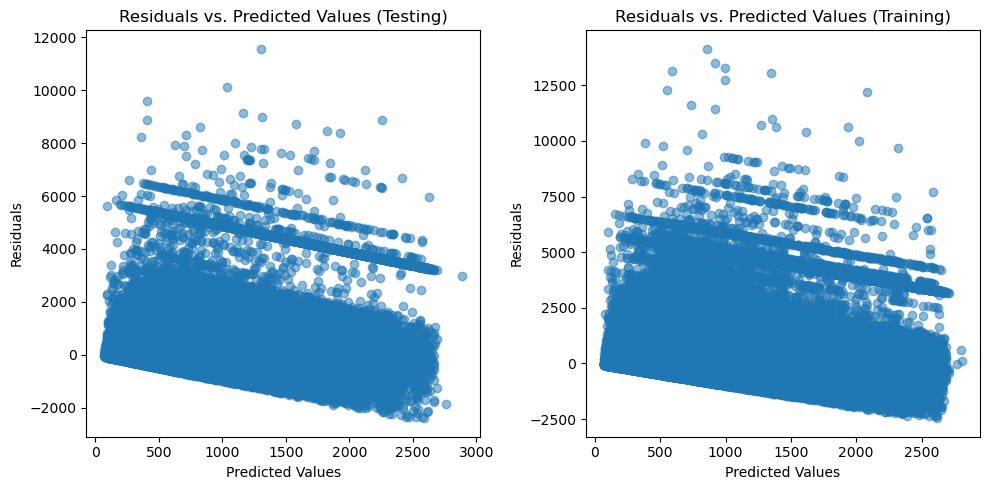

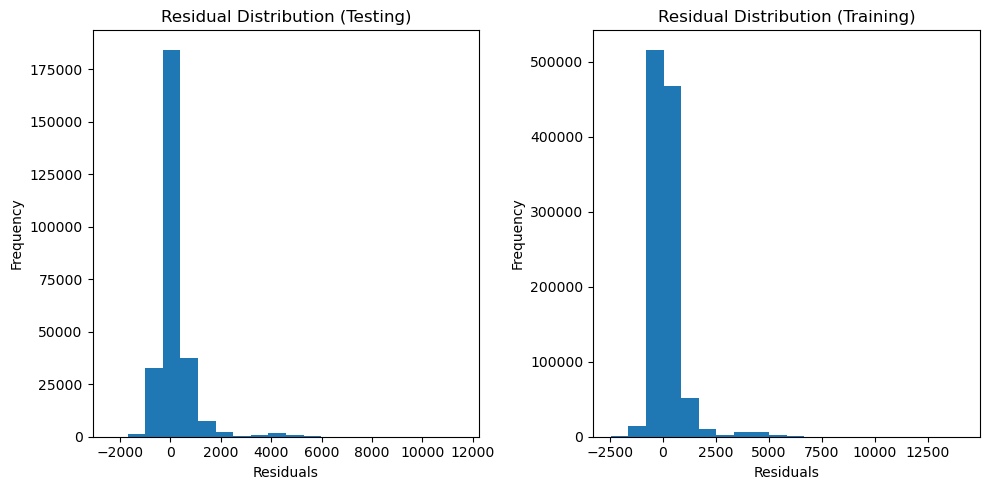

In [55]:
#Residual plot of model 6

import matplotlib.pyplot as plt

# Step 1: Calculate Residuals
residuals_test = np.exp(Y_test) - Y_pred_inverse_test
residuals_train = np.exp(Y_train) - Y_pred_inverse_train

# Step 2: Plot Residuals
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(Y_pred_inverse_test, residuals_test, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Testing)")

plt.subplot(1, 2, 2)
plt.scatter(Y_pred_inverse_train, residuals_train, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Training)")

plt.tight_layout()
plt.show()

# Step 3: Check Residual Distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals_test, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Testing)")

plt.subplot(1, 2, 2)
plt.hist(residuals_train, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Training)")

plt.tight_layout()
plt.show()

# Step 4: Residuals vs. Features (Optional)
# You can create scatter plots of residuals against individual features if needed.


This code will help you visualize and analyze the residuals of your Gradient Boosting Regressor model for both the testing and training sets. Ensure that the residuals exhibit random scatter around zero, indicating that the model's assumptions are met.

In [56]:
# Model 7 using Randomforest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

Y_transform = np.log(Y) 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_transform, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor()

model_7 = rf_regressor.fit(X_train, Y_train)
Y_pred_transform = model_7.predict(X_test)  # Corrected variable name here

Y_pred_inverse = np.exp(Y_pred_transform)

mse = mean_squared_error(np.exp(Y_test), Y_pred_inverse)
print("Mean Squared Error is ,", mse)
r_squared = r2_score(np.exp(Y_test), Y_pred_inverse)  # Also corrected here to use the original scale of Y_test
print("R-squared value  is ,", r_squared)




Y_train_pred = model_7.predict(X_train)
r_squared_train = r2_score(np.exp(Y_train), np.exp(Y_train_pred))  # Apply np.exp to both Y_train and Y_train_pred
print("R-squared (Training):", r_squared_train)

mse_train = mean_squared_error(np.exp(Y_train), np.exp(Y_train_pred))
print("Mean Squared Error (Training):", mse_train)

Mean Squared Error is , 476292.8717771701
R-squared value  is , 0.37190111779118684
R-squared (Training): 0.8433167847812492
Mean Squared Error (Training): 119557.58135588598


Random Forest is typically faster to train than Gradient Boosting, especially for large datasets, because each tree in the forest can be trained independently. Gradient Boosting, on the other hand, builds trees sequentially, which can be computationally more expensive, especially with a large number of iterations and depth.

Robustness to Outliers and Noise: Random Forest tends to be more robust to outliers and noisy data compared to Gradient Boosting. Gradient Boosting can be sensitive to outliers, especially if not properly regularized, leading to overfitting.

There is huge diffrence between r square of training dataset  and testing dataset . This could be a sign of model overfitting

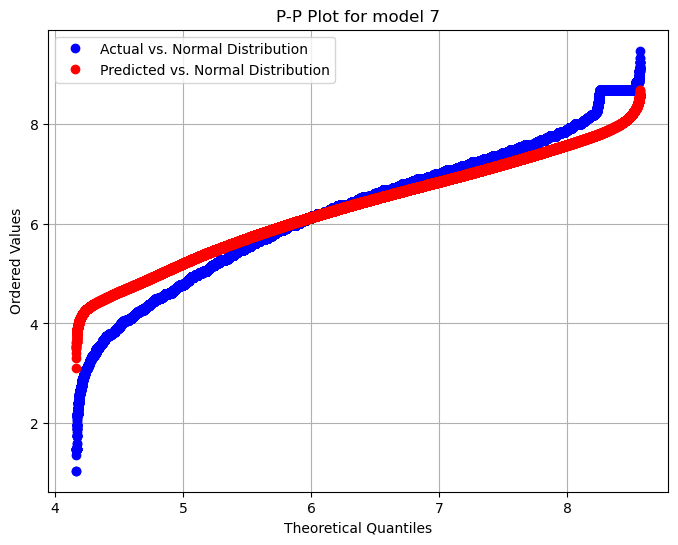

In [57]:
#pp plot of model 7
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Need to do certain calculations manually as these models do not directly support residual analysis like linear regression models.

sorted_predictions = np.sort(Y_pred_transform)
sorted_true_values = np.sort(Y_test)

# Generate theoretical quantiles from a normal distribution with the same mean and standard deviation as the true values
normal_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(sorted_true_values)), loc=np.mean(sorted_true_values), scale=np.std(sorted_true_values))

plt.figure(figsize=(8, 6))
plt.plot(normal_quantiles, sorted_true_values, marker='o', linestyle='none', color='b', label='Actual vs. Normal Distribution')
plt.plot(normal_quantiles, sorted_predictions, marker='o', linestyle='none', color='r', label='Predicted vs. Normal Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('P-P Plot for model 7')
plt.legend()
plt.grid(True)
plt.show()


In the context of evaluating a predictive model, the P-P plot can help assess how well the model's predictions align with the assumed distribution (normal distribution). A good model should produce predicted values that closely match the distribution of the actual data.In the pp plot shown for model 7 , we see they are matching.

In [58]:
#Dimention reduction using PCA 

#Factor analysis to check if PCA is suitable technique for our dataset
#pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

kmo_per_variable, kmo_total = calculate_kmo(df_microwage)
bartlett_test = calculate_bartlett_sphericity(df_microwage)

print("KMO per Variable:", kmo_per_variable)
print("KMO Total:", kmo_total)
print("Bartlett's Test of Sphericity:")
print("  Chi-Square:", bartlett_test[0])
print("  P-value:", bartlett_test[1])


KMO per Variable: [0.56102521 0.56240273 0.69955426 0.63715792 0.87785639 0.40123177
 0.88363065 0.74287059 0.33991871 0.19445036 0.09585234 0.26278608
 0.01410079 0.07042878 0.07824937 0.92059265 0.91151895 0.91063628
 0.37866842 0.61109779 0.61085509]
KMO Total: 0.28887553465378996
Bartlett's Test of Sphericity:
  Chi-Square: 98274610.48988889
  P-value: 0.0


Using factor_analyser library in python , ran a tets to calculate KMO and bartlett_sphericity . From the result of our test we observe that KMO value is too low (0.25) compared to the standard value of 0.60 ,suggesting  that the variables in our dataset may not be suitable for factor analysis. Also , we can see that P-value of the barlett's test of sphericity is nan , which shows the sign of the correlation matrix not being positive definite. Verified the same using SPSS tool . Hence not proceeding with PCA technique.

# 3. Residual Analysis

## 3.1 Residual Plot 

In [59]:
def get_standardised_values(values):
    return (values - values.mean())/values.std()

def plot_residual_fitted (fitted,resid,title):
    plt.scatter(get_standardised_values(fitted),get_standardised_values(resid))
    plt.title(title)
    plt.xlabel("Standardised predicted values")
    plt.ylabel("Standardised residual values")    
    plt.show()

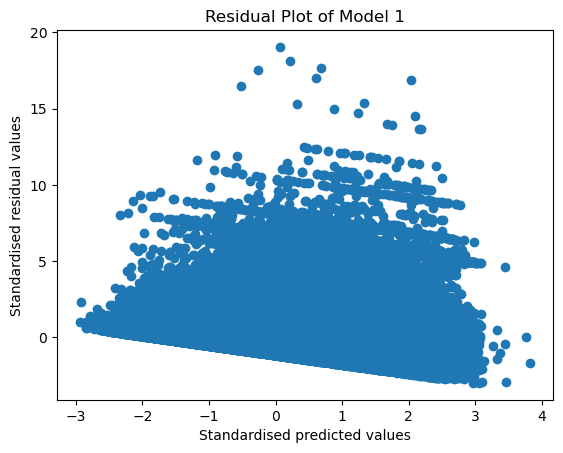

In [60]:
plot_residual_fitted(model_1.fittedvalues,model_1.resid,"Residual Plot of Model 1")

The residuals in the depicted figure exhibit signs of heteroscedasticity, characterized by a funnel-like pattern,meaning the variability of the residuals changes across the range of predicted values.
Further steps to consider are :
1. Transorm Response variable : Transofmations like logarithmic or power transformation can stabilize the variance and alleviate or mitigate  heteroscedasticity.
2. Weighted Least Squares: If tranformation of the response variable doesn't help much , considering Weighted least squares technique  assigns different weights to observations based on their variance, giving more weight to observations with smaller variance.
3. Residual analysis : Further analysis to identify the potential outliers which are contributing to the heteroscadasticity and potentially distorting the results.
4. Nonlinear Models: If the relationship between the predictors and the response variable is nonlinear, we can consider using nonlinear regression models or polynomial regression. These models may better capture the underlying relationship and mitigate heteroscedasticity.


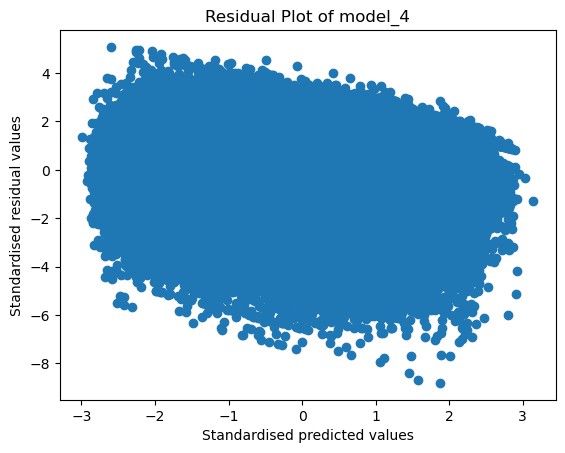

In [61]:
plot_residual_fitted(model_4.fittedvalues,model_4.resid,"Residual Plot of model_4")

We see no see signs of heteroscadasticity in the residual plot of model_4, which is obtained after logarithmic transorformation of the response variable .

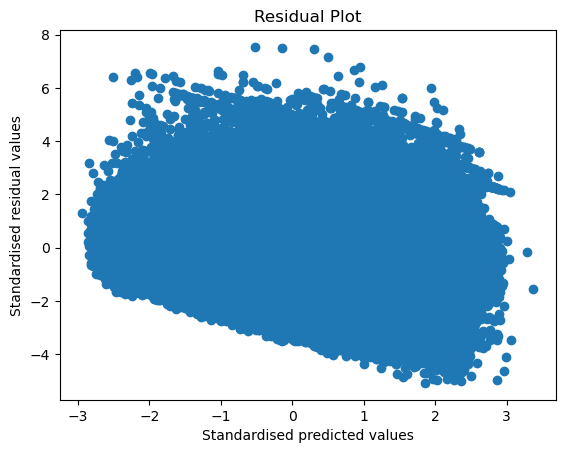

In [62]:
plot_residual_fitted(model_5.fittedvalues,model_5.resid,"Residual Plot")

Plotted residuals for the model which uses cube root tranformation , just to make sure which transformation may be the most appropriate choice for our analysis. Looking at the plot shown above and comparing it with the plot of model_4 , we can choose logarithmic tranformation over cube root transformation , since the residuals are more homoskedastic in model_4 comparitively . 
Also we know that log tranformations are the best suiuted when the skewness is due to exponential growth or multiplicative factors .In our case the "wkwage" (salary) which often exhibits multiplicative relationships, making log transformation a natural choice to linearize these relationships.

## 3.2  P-P Plot

In [63]:
#Normality of the residuals is one of the very important assumptions of regression , which we are going to verify using P-P plot

def pp_plot (model , title) :
    probplot = sm.ProbPlot(model.resid)
    plt.figure(figsize = (6,4))
    probplot.ppplot(line='45')
    plt.title(title)
    plt.show()


P-P plot suggests that the distribution of our data differs significantly from the normal distribution.
From the graph we can intrepret that:
1.Our data has heavy outliers compared to the normal distribution, indicating that extreme values occur more frequently than expected under the assumed distribution.
2.Non-normality in the data , meaning that our data deviates significantly from the normal distribution.
3.Also the graph hints about a systematic bias or error in the data collection process, which can be confirmed by further investigation by checking the distribution of the encoded categorical values as well.

<Figure size 600x400 with 0 Axes>

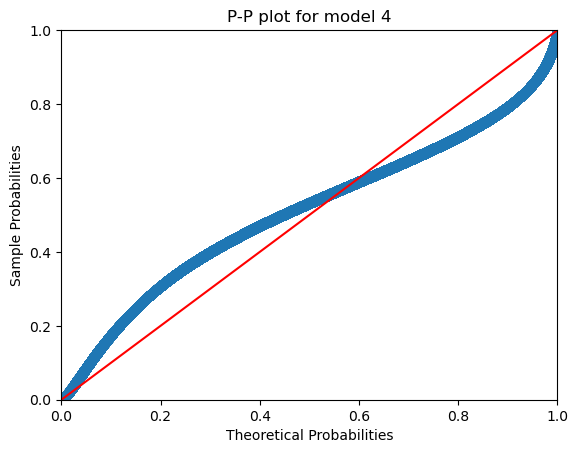

In [64]:
pp_plot(model_4,'P-P plot for model 4') 

P-P plot of model_4 shows, symmetric pattern along the normal distribution line as compared to that of model_3 P-P plot, indicating that the residuals may be approximately normally distributed. This is a positive sign, suggesting that the residuals follow a normal distribution, which is a key assumption of linear regression models.

In [ ]:
# import pickle



# pickle_file_path = 'final_model.pkl'

# with open(pickle_file_path, 'wb') as f:
#     pickle.dump(model_7, f)